# MS0240 MAI Assignment 1 PCA: Question 1
Carry out PCA on a food nutrition dataset.

This dataset is a subset of the whole dataset containing nutritional information of food products, taken from The United States Department of Agriculture's (USDA) National Nutrient Database. The amount of nutrients per 100g of each food product is recorded

In [50]:
# load necessary libraries for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

## Information about the dataset
The dataset has 6 numerical variables and 2 descriptive columns.

From numerical summary, it is shown that `VitA_mcg` has the highest mean of 187mcg, while mean of the other 5 variables range from 3.70 to 28.3.

The variables in the dataset also uses different scales. `VitA_mcg` uses micrograms, while the 5 other variables uses grams for its unit of measurement.

In [51]:
food_df = pd.read_csv('data/food_nutrition.csv') # import data into pandas dataframe
food_df.head() # making sure dataset loaded properly

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,"Turkey, all classes, wing, meat and skin, raw",20.22,12.32,0.00,0.00,0.0,3
1,Fruits and Fruit Juices,"Pears, raw, green anjou",0.44,0.10,15.79,9.73,3.1,1
2,Fruits and Fruit Juices,"Maraschino cherries, canned, drained",0.22,0.21,41.97,38.77,3.2,2
3,Poultry Products,"Chicken, stewing, meat only, cooked, stewed",30.42,11.89,0.00,0.00,0.0,34
4,Breakfast Cereals,"Cereals ready-to-eat, wheat and bran, presweet...",7.10,5.60,76.20,23.60,9.7,410


In [52]:
food_df.info() # brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         234 non-null    object 
 1   Description  234 non-null    object 
 2   Protein_g    234 non-null    float64
 3   Fat_g        234 non-null    float64
 4   Carb_g       234 non-null    float64
 5   Sugar_g      234 non-null    float64
 6   Fiber_g      234 non-null    float64
 7   VitA_mcg     234 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 14.8+ KB


### Numerical Summary using .describe()

In [53]:
food_df.describe() # numerical summary of the dataset

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,8.908462,4.803803,28.265556,11.064573,3.702991,187.047009
std,9.830258,6.560120,32.084279,12.569516,4.405083,261.453321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.200000,6.640000,1.185000,1.200000,2.000000
50%,4.850000,2.100000,14.400000,3.830000,2.600000,32.500000
75%,12.132500,7.300000,74.465000,19.667500,5.175000,383.750000
max,30.420000,40.680000,89.300000,57.190000,42.500000,943.000000


### Boxplot of all nutrients

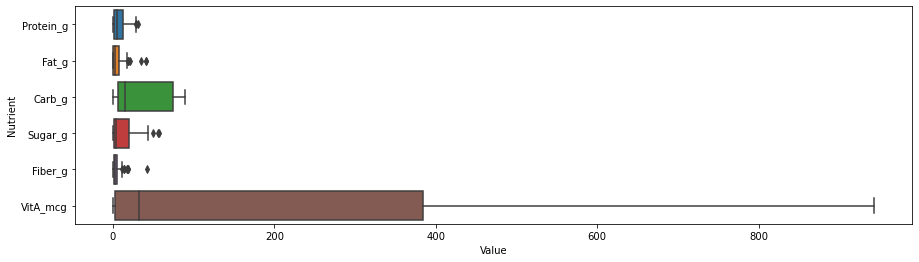

In [54]:
boxplot_df = food_df.melt(id_vars=["Description", "Type"], 
                var_name="Nutrient", 
                value_name="Value")

plt.figure(figsize=(15,4))
sns.boxplot(x='Value', y='Nutrient', data=boxplot_df)
plt.show()

## PCA on the dataset

### Data Preprocessing and PCA
1. Drop the descriptive columns in the dataset as they are not needed for PCA
2. Standardize the dataset so that variables with large magnitudes will not dominate higher PCs
3. Concatenate Type column back to standardized values
4. Fit and transform the scaled dataset using PCA object from sk-learn

In [55]:
reduced_df = food_df.drop(columns=['Type', 'Description']) # drop descriptive columns
reduced_df.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,20.22,12.32,0.00,0.00,0.0,3
1,0.44,0.10,15.79,9.73,3.1,1
2,0.22,0.21,41.97,38.77,3.2,2
3,30.42,11.89,0.00,0.00,0.0,34
4,7.10,5.60,76.20,23.60,9.7,410


In [56]:
scaler = StandardScaler() # StandardScaler object
scaler.fit(reduced_df) # fit scaler on original data

StandardScaler()

In [57]:
scaled_data = pd.DataFrame(scaler.transform(reduced_df), columns=reduced_df.columns) # standardize data
scaled_data.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,1.153152,1.148197,-0.882867,-0.882157,-0.842420,-0.705447
1,-0.863316,-0.718567,-0.389671,-0.106403,-0.137179,-0.713113
2,-0.885743,-0.701763,0.428055,2.208901,-0.114429,-0.709280
3,2.192989,1.082509,-0.882867,-0.882157,-0.842420,-0.586625
4,-0.184363,0.121629,1.497219,0.999426,1.364302,0.854573


In [58]:
scaled_df = pd.concat([scaled_data, food_df['Type']], axis=1) # concatenate back the type column to standardized data
scaled_df.head() # check values have been scaled

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,Type
0,1.153152,1.148197,-0.882867,-0.882157,-0.842420,-0.705447,Poultry Products
1,-0.863316,-0.718567,-0.389671,-0.106403,-0.137179,-0.713113,Fruits and Fruit Juices
2,-0.885743,-0.701763,0.428055,2.208901,-0.114429,-0.709280,Fruits and Fruit Juices
3,2.192989,1.082509,-0.882867,-0.882157,-0.842420,-0.586625,Poultry Products
4,-0.184363,0.121629,1.497219,0.999426,1.364302,0.854573,Breakfast Cereals


In [59]:
pca = PCA(n_components=6).fit(scaled_data) # fit PCA object
pca_results = pca.transform(scaled_data) # transform dataset

### PCA Results Table
PC1 and PC2 has eigenvalues of above 1 while all other PCs have eigenvalues of below 1.

PC1 and PC2 together has a cumulative explained variance of above 80%

In [60]:
def pca_results(data, pca):
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

pca_results = pca_results(scaled_data, pca) # use function created to show table
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
PC 1,3.3609,0.5578,0.5578,-0.2884,-0.2594,0.5052,0.4757,0.4466,0.4106
PC 2,1.6162,0.2682,0.8260,0.6283,0.6547,0.2250,0.1195,0.1158,0.3136
PC 3,0.4188,0.0695,0.8955,0.1016,-0.0431,-0.1233,-0.4933,0.8411,-0.1477
PC 4,0.3982,0.0661,0.9616,-0.0793,-0.1393,-0.1604,-0.4999,-0.1705,0.8183
PC 5,0.1595,0.0265,0.9880,-0.7065,0.6943,-0.0963,-0.0447,0.0842,0.0211
PC 6,0.0722,0.0120,1.0000,0.0796,-0.0286,-0.8025,0.5140,0.2085,0.2030


### Scree Plot
Inflection point starts at PC3

<Figure size 432x288 with 0 Axes>

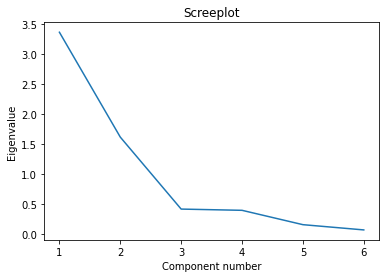

In [61]:
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

## PCA: extract first 2 PCs
Based on intepretation using the results above, I decided to extract the first 2 PCs

In [62]:
pca2 = PCA(n_components=2).fit(scaled_data) # fit a PCA object to extract first 2 PCs
pca2_results = pca2.transform(scaled_data)

In [63]:
pca_components_df = pd.DataFrame(pca2.components_, columns=scaled_data.columns) # Linear system for PC1 and PC2
pca_components_df = pca_components_df.rename(index={0:'PC1', 1:'PC2'})
pca_components_df

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
PC1,-0.288363,-0.259392,0.505242,0.475652,0.446642,0.410560
PC2,0.628268,0.654692,0.224962,0.119515,0.115814,0.313612


### Loading Plot

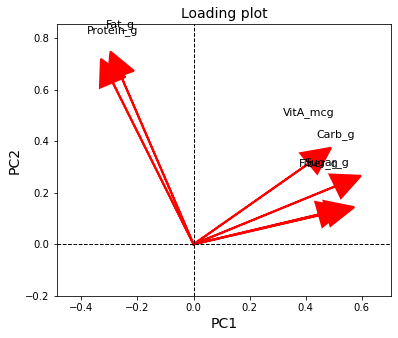

In [64]:
def loadingplot(data, pca, width, height, margin=0.5):
    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=11)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

plt.clf
ax2 = loadingplot(scaled_data, pca2, width=6, height=5, margin=0.2)
plt.show()

### Score Plot

In [65]:
fig = px.scatter(pca2_results, x=0, y=1, color=scaled_df['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Score Plot',
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Type"
)

fig.show()

### Function: Determine point on Scoreplot based on nutrient values
This is a function to calculate PC1 and PC2 values based on the nutrient values.
It can be used to find out the possible type of food based on nutrient values given

In [66]:
def calc_line(protein, fat, carb, sugar, fiber, vitA): # calculate direction on biplot using nutrient values
    variables = pd.DataFrame([[protein, fat, carb, sugar, fiber, vitA]], columns=reduced_df.columns) # create dataframe for values
    variables_scaled = scaler.transform(variables)[0] # standardize the values (using fit from original data) and make into 1d array
    calc_pc1 = np.dot(np.array(pca2.components_)[0], variables_scaled) # calculate pc1
    calc_pc2 = np.dot(np.array(pca2.components_)[1], variables_scaled) # calculate pc2

    return calc_pc1, calc_pc2

### (c)(i): Biplot
When the food item has low Fat and Protein and is high in other nutrients, the direction of line created points towards to the Breakfast Cereals cluster.

In [67]:
fig = px.scatter(pca2_results, x=0, y=1, color=scaled_df['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Biplot: Low in Fat and Protein, high in other nutrients',
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Type"
)

loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_) # calculate loadings for the PCA

# find the direction of the line when low protein and fat but high in other nutrients
# nutrient values entered are based on food_df.describe
# Protein and Fat: Value at lower quartile
# Other nutrients: Maximum possible value
pc1_point_qn_ci, pc2_point_qn_ci = calc_line(1, 0.2, 89, 57, 42, 943) # enter nutrient values into the function

fig.add_shape( # add line to biplot
    type='line',
    x0=0, y0=0,
    x1=pc1_point_qn_ci,
    y1=pc2_point_qn_ci
)
fig.add_annotation( # annotate the line
    x=pc1_point_qn_ci,
    y=pc2_point_qn_ci,
    ax=0, ay=0,
    xanchor="center",
    yanchor="bottom",
    text='Direction based on nutrient values',
)

# add loadings to the plot
features = list(scaled_data.columns) 
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

### (c)(ii): Biplot

In [69]:
fig = px.scatter(pca2_results, x=0, y=1, color=scaled_df['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Biplot: High in Fat and Protein, low in other nutrients',
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Type"
)

loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_) # calculate loadings for the PCA

# find the direction of the line when low protein and fat but high in other nutrients
# nutrient values entered are based on food_df.describe
# Protein and Fat: Maximum possible value
# Other nutrients: Value at lower quartile
pc1_point_qn_cii, pc2_point_qn_cii = calc_line(30, 40, 6, 1, 1, 2) # enter nutrient values into the function

fig.add_shape( # add line to biplot
    type='line',
    x0=0, y0=0,
    x1=pc1_point_qn_cii,
    y1=pc2_point_qn_cii
)
fig.add_annotation( # annotate the line
    x=pc1_point_qn_cii,
    y=pc2_point_qn_cii,
    ax=0, ay=0,
    xanchor="center",
    yanchor="bottom",
    text='Direction based on nutrient values',
)

# add loadings to the plot
features = list(scaled_data.columns) 
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

### (d): Calculate PC1 and PC2

In [71]:
# code working for question (d)
values = np.array([[0.3, 0.1, 19.6, 16.7, 2.9, 2]]) # put values in numpy array
scaled_values = scaler.transform(pd.DataFrame(values, columns=scaled_data.columns)) # standardize values
pc_equations = np.array(pca2.components_).T # transpose linear equations for PC1 and PC2

score = np.dot(scaled_values, pc_equations) # matrix multiplication to get vector from nutrient values given

score

array([[ 0.14362031, -1.27258756]])

### (d): Plot point on scoreplot

In [72]:
fig = px.scatter(pca2_results, x=0, y=1, color=scaled_df['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Score Plot with Point Calculated',
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Type"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode='markers',
        x=[score[0, 0]],
        y=[score[0, 1]],
        marker=dict(
            color='darkslateblue',
            size=14,
        ),
        showlegend=True,
        name='Point Calculated'
    )
)

fig.show()